In [34]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

2. Mengumpulkan dataset

In [84]:
data = pd.read_csv("Salary_Data.csv")

3. EDA

In [66]:
# Step 3: Data Understanding
print(data.info())
print(data.describe())
print("\nJumlah data dengan null")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.00

In [63]:
# Step 4: Data Cleaning 
data = data.dropna() 
print("\nSetelah dihapus null")
print(data.isnull().sum())


Setelah dihapus null
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


Visualisasi

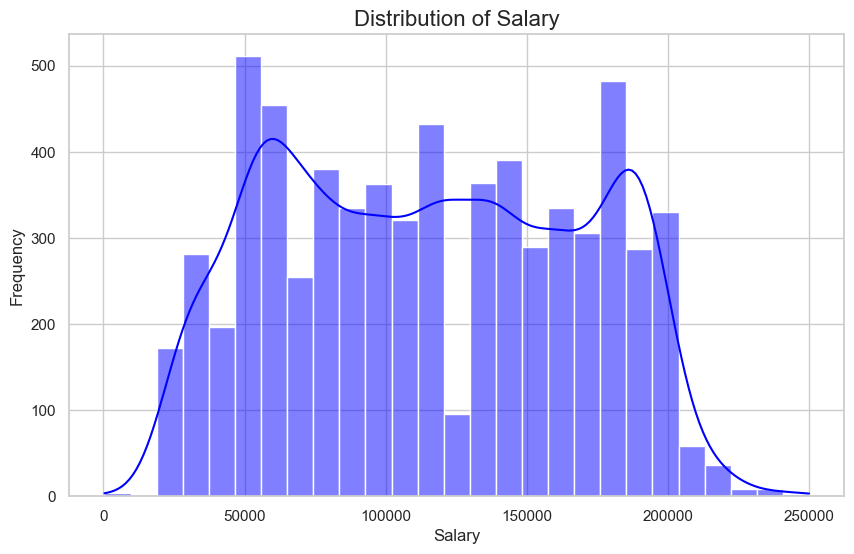

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the visualizations
sns.set(style="whitegrid")

# 1. Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], kde=True, color='blue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

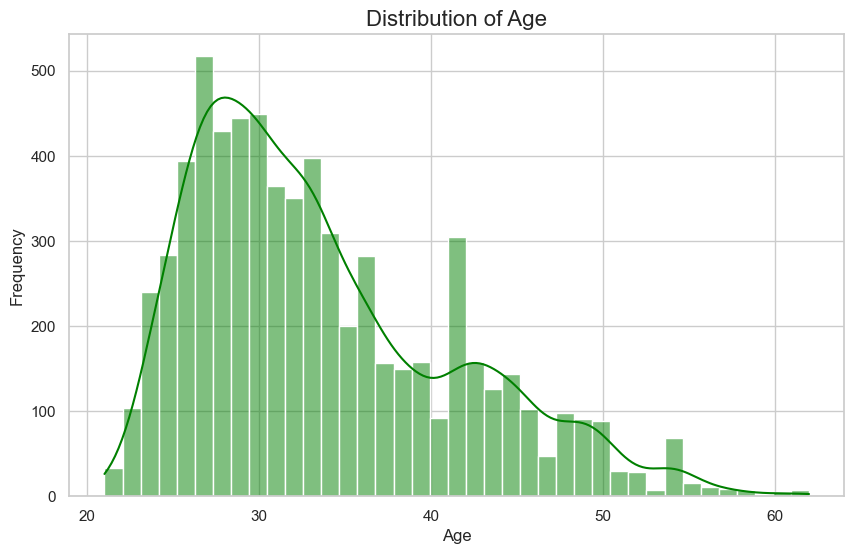

In [75]:
# 6. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='green')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\Yessy Arye Yustraini\AppData\Local\Temp\ipykernel_32784\3663516967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Salary', data=data, palette='pastel')


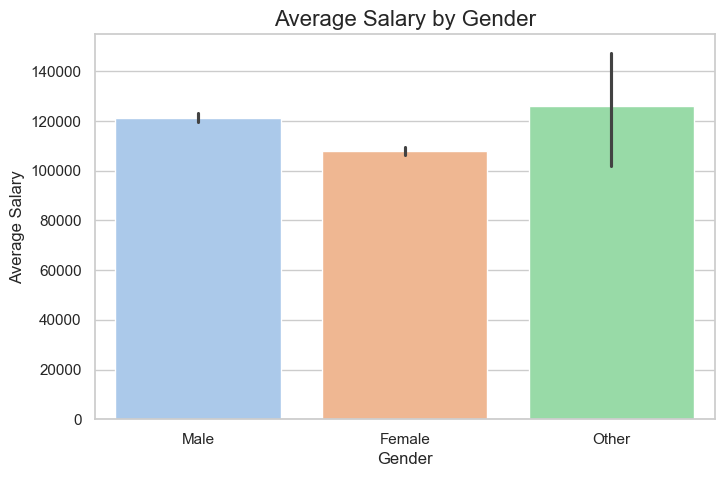

In [70]:
# 2. Average Salary by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Salary', data=data, palette='pastel')
plt.title('Average Salary by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.show()

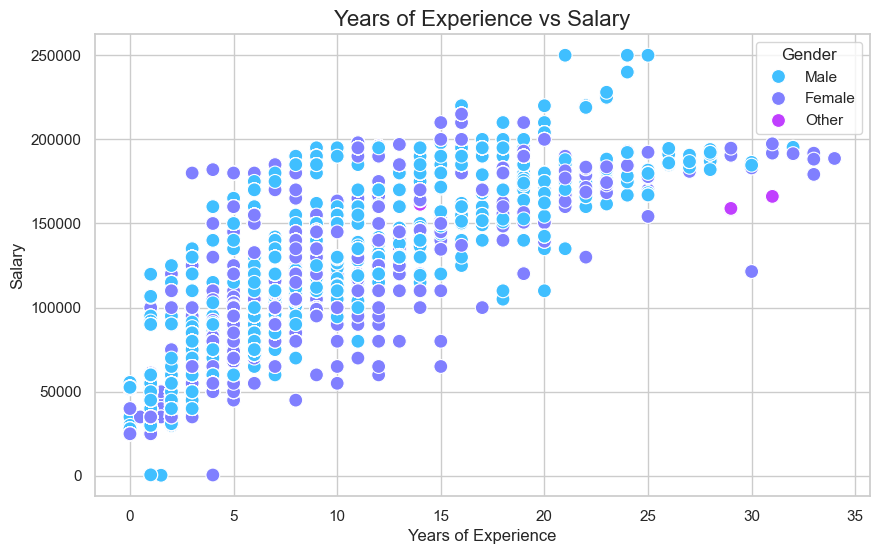

In [71]:
# 3. Relationship between Years of Experience and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Gender', data=data, palette='cool', s=100)
plt.title('Years of Experience vs Salary', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend(title='Gender')
plt.show()

C:\Users\Yessy Arye Yustraini\AppData\Local\Temp\ipykernel_32784\2136484597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='Salary', data=data, palette='Set2')


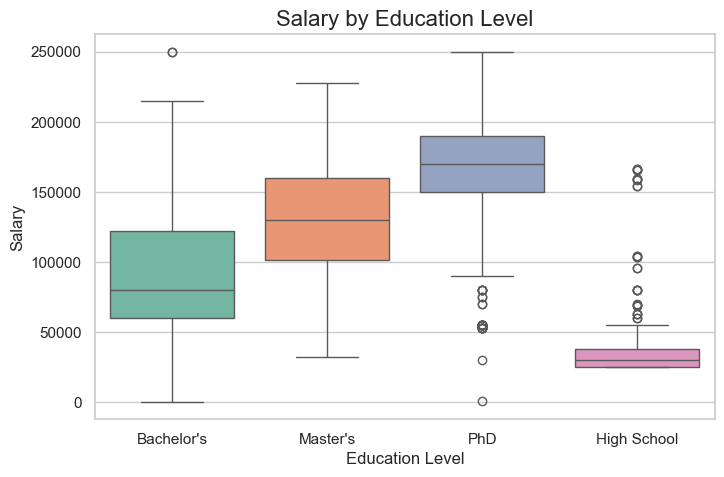

In [85]:
# 4. Salary by Education Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education Level', y='Salary', data=data, palette='Set2')
plt.title('Salary by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

4. preprocessing

In [38]:
# Step 5: Feature Engineering
# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [39]:
# Step 6: Scaling numerical features
scaler_X = StandardScaler()
data[['Age', 'Years of Experience']] = scaler_X.fit_transform(data[['Age', 'Years of Experience']])

# Scale the target variable (Salary) separately
scaler_y = StandardScaler()
data['Salary'] = scaler_y.fit_transform(data['Salary'].values.reshape(-1, 1)).ravel()

In [40]:
# Step 7: Splitting the dataset
X = data.drop(columns=['Salary'])
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. pemilihan model

In [41]:
# Step 8: Model Development
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)


Model Performance:
                               MAE       MSE        R2
Linear Regression         0.455140  0.332494  0.675099
Random Forest             0.061210  0.025063  0.975509
Gradient Boosting         0.187044  0.066229  0.935283
Support Vector Regressor  0.474359  0.388202  0.620662


6. Pelatihan model

In [42]:
# Step 9: Hyperparameter Tuning (Example with Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:")
print(grid_search.best_params_)



Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [43]:
# Step 10: Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_salary_predict.pkl')

['best_salary_predict.pkl']

Visualisasi

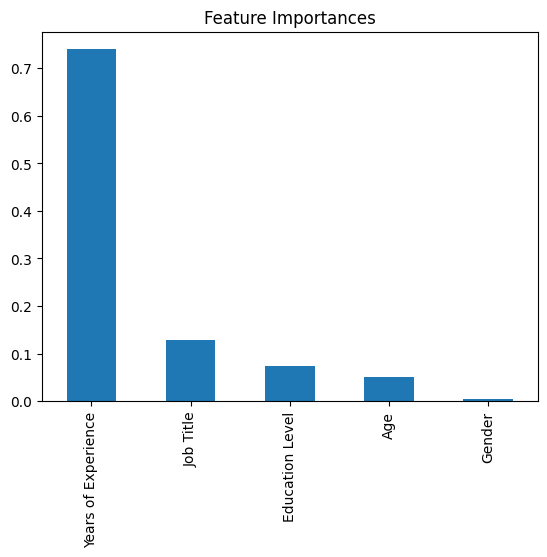

In [44]:
# Step 11: Visualize important features (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importances')
    plt.show()

In [45]:
# Example Usage with new data
print("\nExample Prediction:")

# Load model yang telah disimpan
loaded_model = joblib.load('best_salary_predict.pkl')

# Data baru untuk prediksi
new_data = pd.DataFrame({
    'Age': [20],  # contoh umur
    'Gender': ['Female'],  # jenis kelamin
    'Education Level': ["Bachelor's"],  # tingkat pendidikan
    'Job Title': ['Software Engineer'],  # judul pekerjaan
    'Years of Experience': [2]  # pengalaman kerja
})

# Preprocess new data (encode and scale)
for column in ['Gender', 'Education Level', 'Job Title']:
    le = label_encoders[column]
    new_data[column] = new_data[column].apply(lambda x: le.transform([x])[0])

new_data[['Age', 'Years of Experience']] = scaler_X.transform(new_data[['Age', 'Years of Experience']])

# Prediksi
prediction = loaded_model.predict(new_data)
predicted_salary_original = scaler_y.inverse_transform(prediction.reshape(-1, 1)).ravel()
print(f"Predicted Salary: ${predicted_salary_original[0]:.0f}")



Example Prediction:
Predicted Salary: $68775


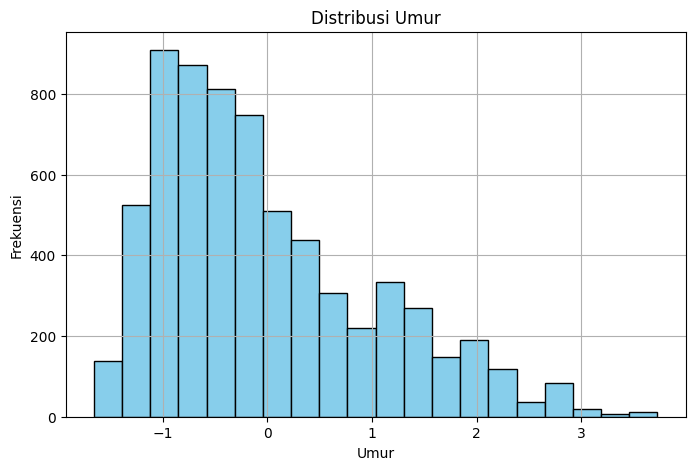

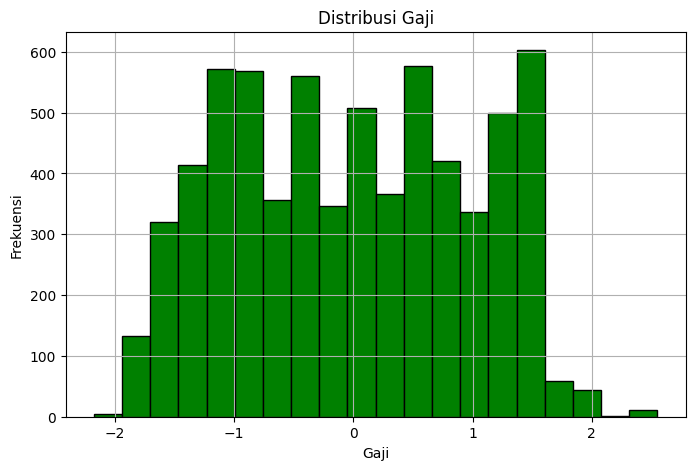

In [46]:
import matplotlib.pyplot as plt

# Visualisasi distribusi umur
plt.figure(figsize=(8, 5))
data['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi distribusi gaji
plt.figure(figsize=(8, 5))
data['Salary'].hist(bins=20, color='green', edgecolor='black')
plt.title('Distribusi Gaji')
plt.xlabel('Gaji')
plt.ylabel('Frekuensi')
plt.show()



C:\Users\Yessy Arye Yustraini\AppData\Local\Temp\ipykernel_32784\3235665038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Salary', palette='Set2')


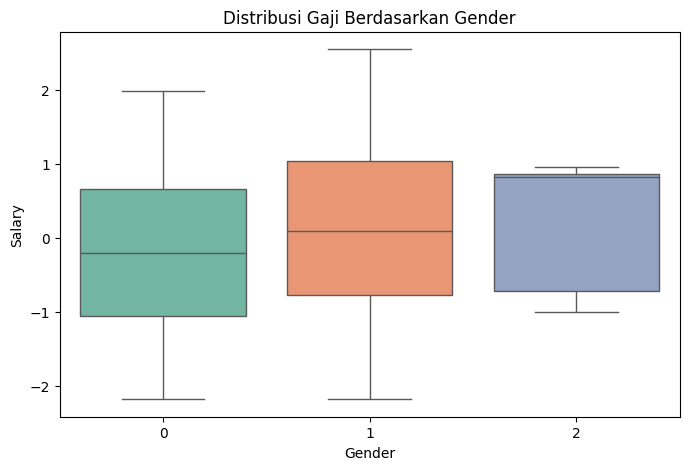

C:\Users\Yessy Arye Yustraini\AppData\Local\Temp\ipykernel_32784\3235665038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Education Level', y='Years of Experience', palette='coolwarm')


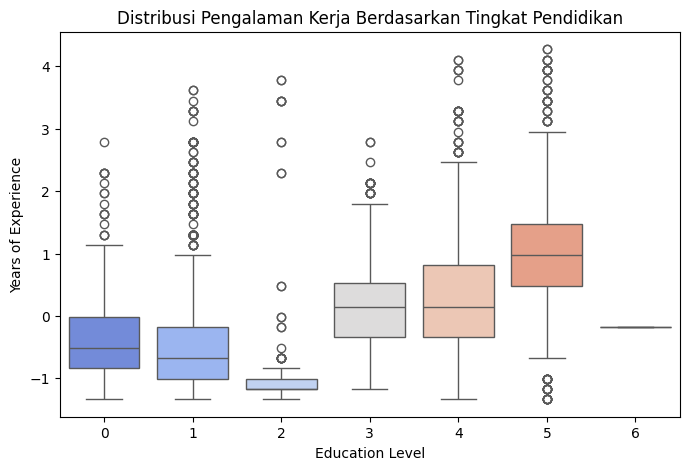

In [47]:
# Boxplot untuk gaji berdasarkan jenis kelamin
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Gender', y='Salary', palette='Set2')
plt.title('Distribusi Gaji Berdasarkan Gender')
plt.show()

# Boxplot untuk pengalaman kerja
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Education Level', y='Years of Experience', palette='coolwarm')
plt.title('Distribusi Pengalaman Kerja Berdasarkan Tingkat Pendidikan')
plt.show()


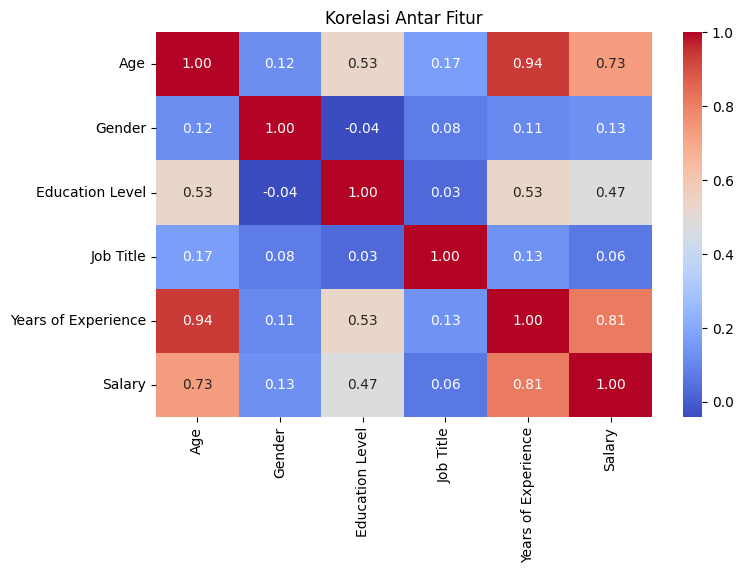

In [48]:
# Heatmap korelasi
plt.figure(figsize=(8, 5))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()


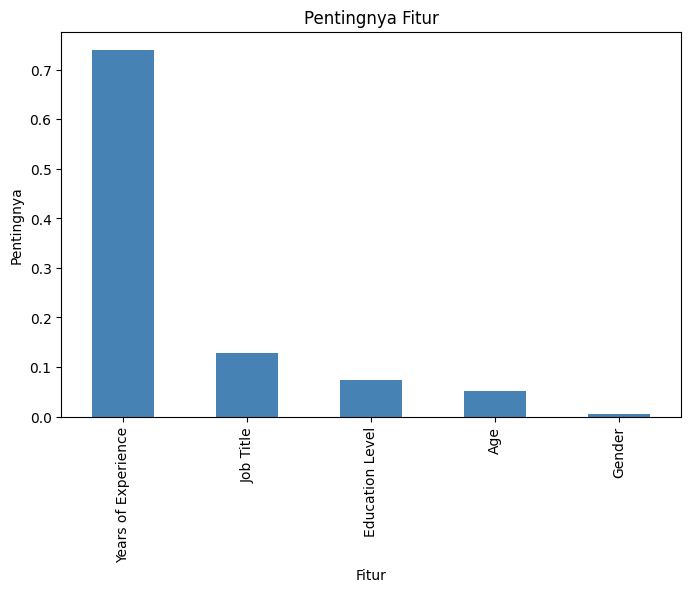

In [49]:
# Visualisasi pentingnya fitur
if hasattr(best_model, 'feature_importances_'):
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False).plot(kind='bar', color='steelblue', figsize=(8, 5))
    plt.title('Pentingnya Fitur')
    plt.ylabel('Pentingnya')
    plt.xlabel('Fitur')
    plt.show()

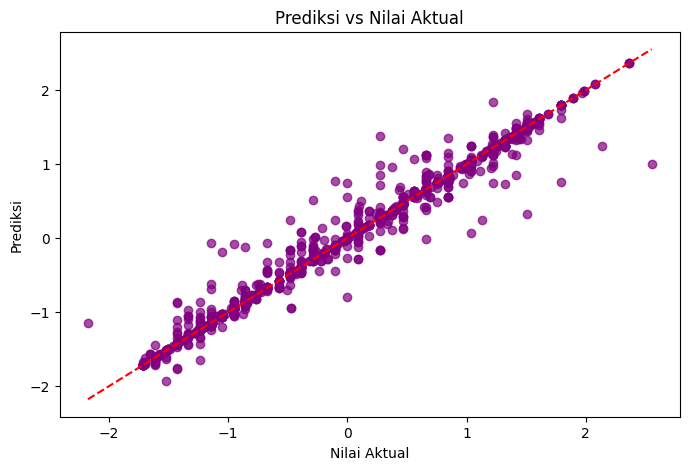

In [50]:
# Scatter plot untuk melihat prediksi vs nilai aktual
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.title('Prediksi vs Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.show()


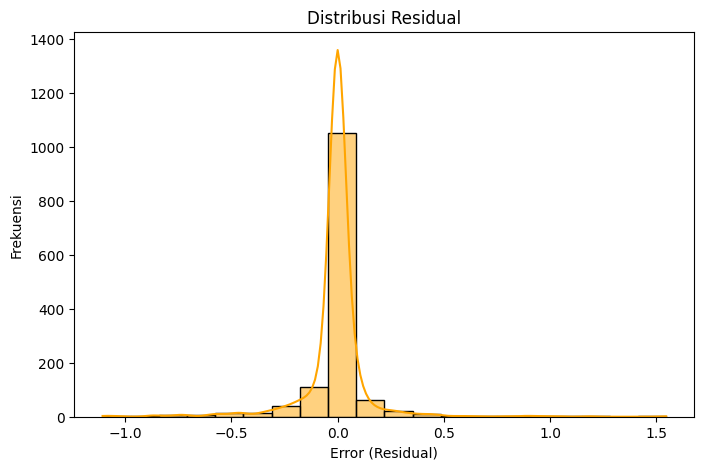

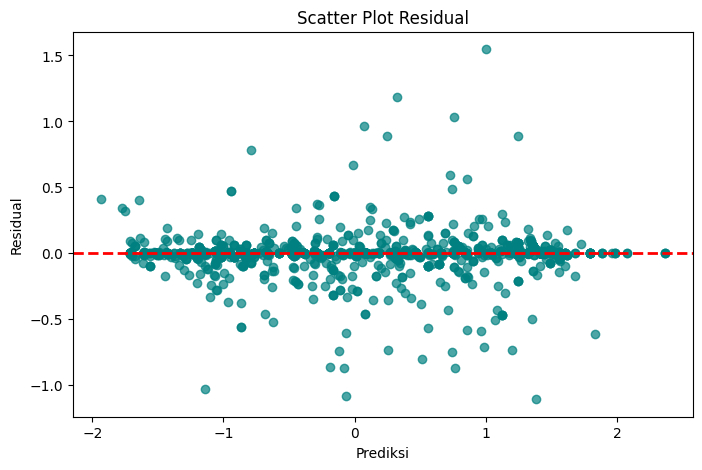

In [51]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='orange', bins=20)
plt.title('Distribusi Residual')
plt.xlabel('Error (Residual)')
plt.ylabel('Frekuensi')
plt.show()

# Scatter plot residual
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, color='teal')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.title('Scatter Plot Residual')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.show()


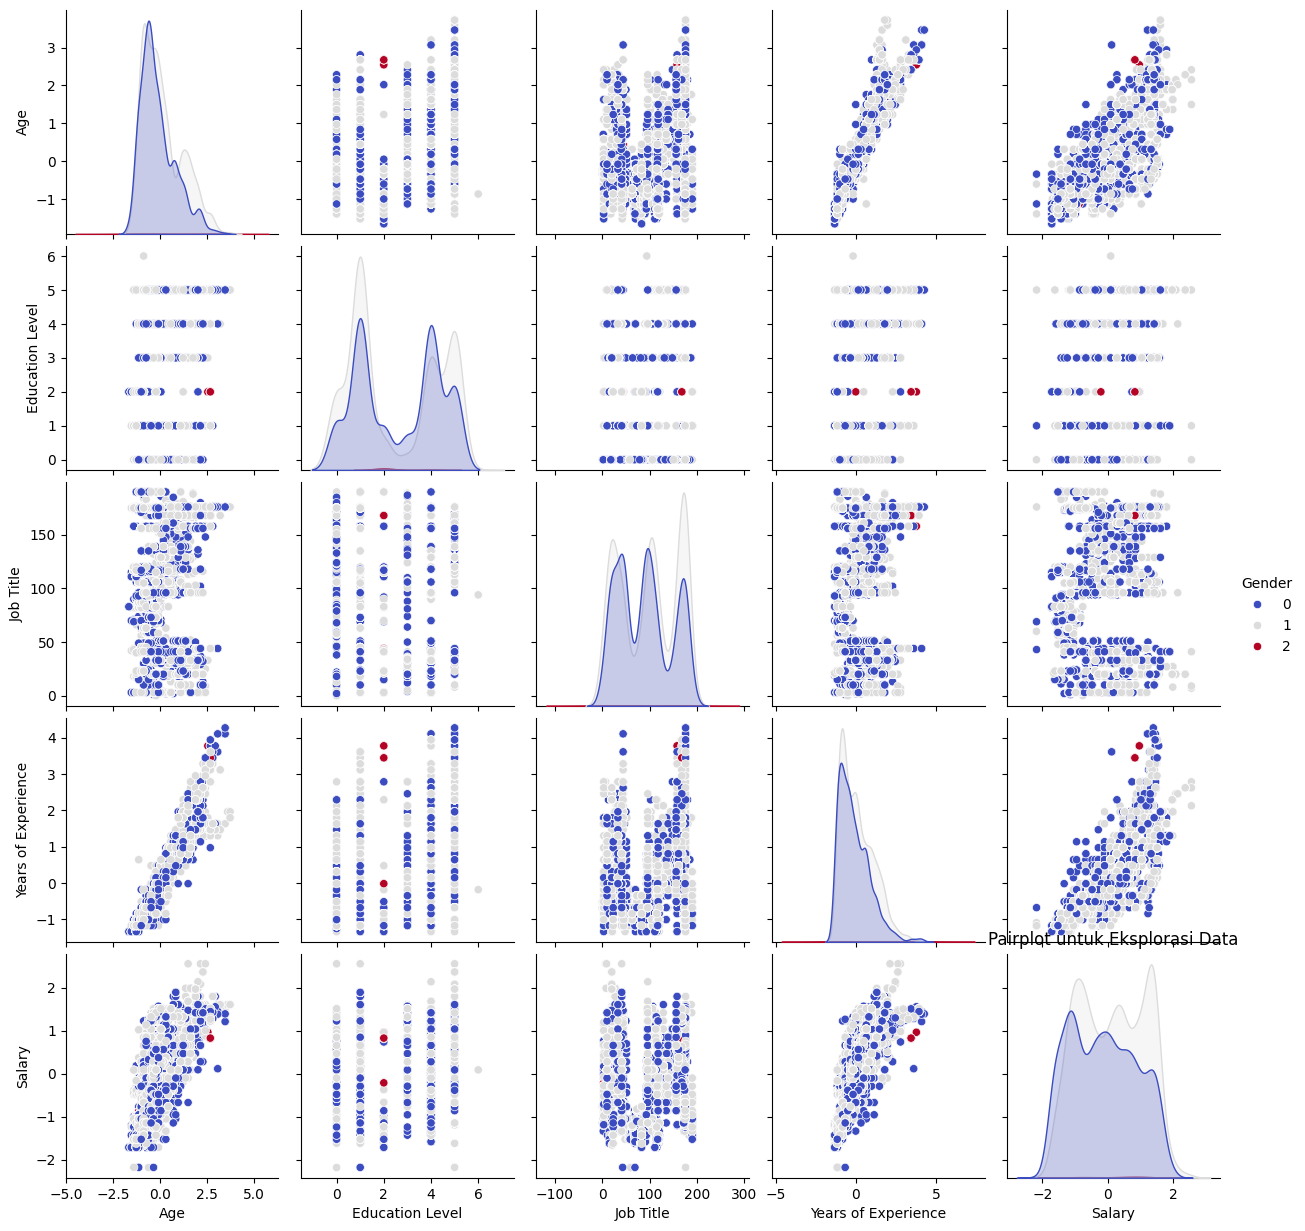

In [52]:
sns.pairplot(data, hue='Gender', palette='coolwarm', diag_kind='kde')
plt.title('Pairplot untuk Eksplorasi Data')
plt.show()


Visualisasi model

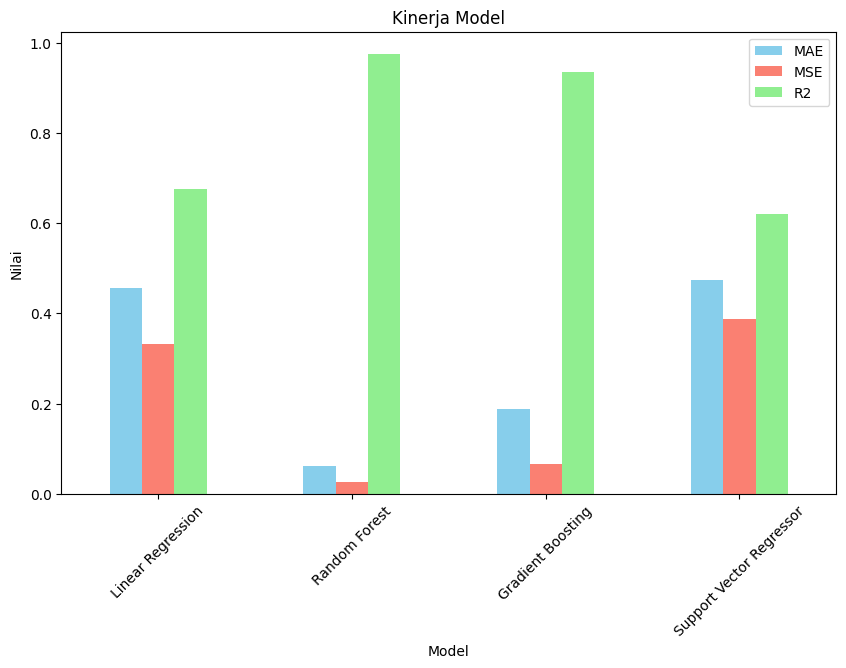

In [53]:
# Visualisasi kinerja model
results_df[['MAE', 'MSE', 'R2']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Kinerja Model')
plt.ylabel('Nilai')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(['MAE', 'MSE', 'R2'])
plt.show()


Validation

In [54]:
from sklearn.model_selection import cross_val_score

# Menggunakan Cross-Validation untuk mengevaluasi model
k = 5  # jumlah fold
model = RandomForestRegressor(random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=k, scoring='r2')

print(f'R2 Score dari Cross-Validation (rata-rata dari {k} fold): {scores.mean():.3f}')


R2 Score dari Cross-Validation (rata-rata dari 5 fold): 0.975


In [55]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning dengan cross-validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f'R2 Score dari Model Terbaik: {grid_search.best_score_:.3f}')


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score dari Model Terbaik: 0.975


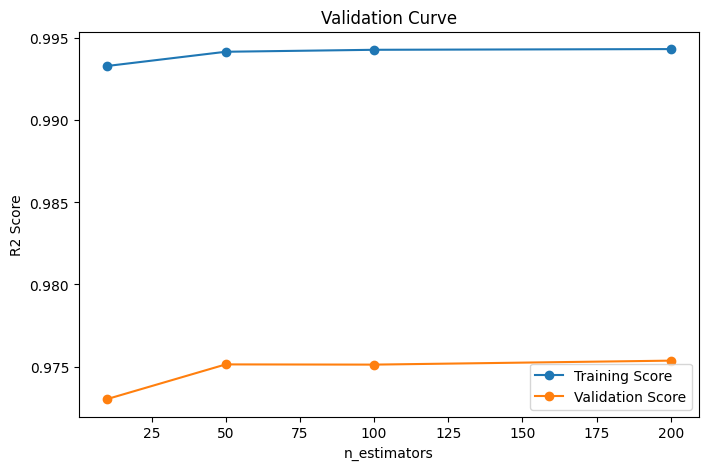

In [56]:
from sklearn.model_selection import validation_curve

# Validation curve untuk Random Forest
from sklearn.ensemble import RandomForestRegressor
param_range = [10, 50, 100, 200]
train_scores, test_scores = validation_curve(
    RandomForestRegressor(random_state=42),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    scoring="r2",
    cv=5
)

# Visualisasi validation curve
plt.figure(figsize=(8, 5))
plt.plot(param_range, train_scores.mean(axis=1), label='Training Score', marker='o')
plt.plot(param_range, test_scores.mean(axis=1), label='Validation Score', marker='o')
plt.title('Validation Curve')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


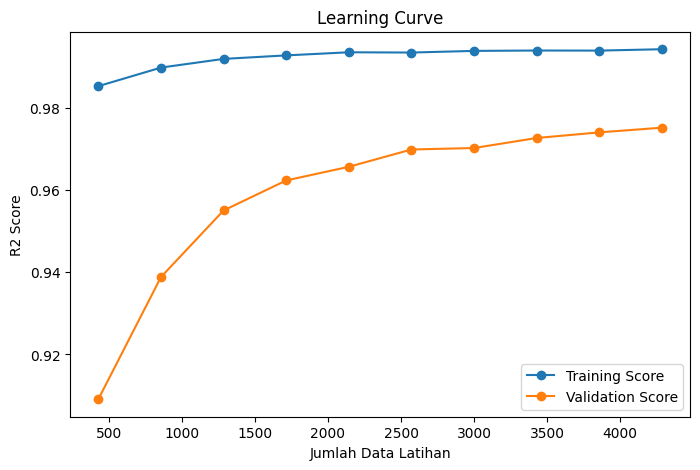

In [57]:
from sklearn.model_selection import learning_curve

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42),
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="r2",
    cv=5
)

# Visualisasi learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score', marker='o')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score', marker='o')
plt.title('Learning Curve')
plt.xlabel('Jumlah Data Latihan')
plt.ylabel('R2 Score')
plt.legend()
plt.show()
